In [78]:
import geopandas as gpd
import pandas as pd

import mapillary as mly
#import json

import glob


import gzip




### netzwerk einlesen

In [79]:

#set_date = "250805" 
#set_date = "250930" 
set_date = "251010" 

bicycle_ways=gpd.read_parquet(f"processed_osm_files/processed_bicycle_germany_{set_date}.parquet")
#motorways=gpd.read_parquet(f"processed_osm_files/processed_motorways_germany_{set_date}.parquet")



In [80]:
len(bicycle_ways)

2086314

In [81]:
bicycle_ways.columns

Index(['osm_id', 'highway', 'bicycle', 'bicycle_forward', 'bicycle_backward',
       'cycleway', 'cycleway_left', 'cycleway_right', 'cycleway_both',
       'cycleway_lane', 'cycleway_track', 'cycleway_opposite',
       'cycleway_shared_lane', 'sidewalk_right_bicycle',
       'sidewalk_left_bicycle', 'sidewalk_both_bicycle', 'maxspeed',
       'maxspeed_conditional', 'maxspeed_backward', 'maxspeed_forward',
       'maxspeed_type', 'name', 'ref', 'surface', 'width', 'oneway_bicycle',
       'geometry'],
      dtype='object')

In [82]:
filtered_bicycle_ways = bicycle_ways[

    # Freigabe Fußweg / ggf auch track

# ggf auch designated mitnehmen zb https://maproulette.org/challenge/53361/task/307994158 oder https://maproulette.org/challenge/53361/task/307994364
# 

    (bicycle_ways["bicycle"].isin(["yes","designated"])) |
    (bicycle_ways["bicycle_backward"].isin(["yes","designated"])) |
    (bicycle_ways["bicycle_forward"].isin(["yes","designated"])) |
    (bicycle_ways["sidewalk_right_bicycle"].isin(["yes"])) |
    (bicycle_ways["sidewalk_left_bicycle"].isin(["yes"])) |
    (bicycle_ways["sidewalk_both_bicycle"].isin(["yes"])) |

    # Freigabe Einbahnstraße
    (bicycle_ways["oneway_bicycle"].isin(["no"])) |

    # Freigabe Busspur
    (bicycle_ways["cycleway"].isin(["share_busway"])) |
    (bicycle_ways["cycleway_left"].isin(["share_busway"])) |
    (bicycle_ways["cycleway_right"].isin(["share_busway"])) |
    (bicycle_ways["cycleway_both"].isin(["share_busway"])) 
]
len(filtered_bicycle_ways)

1052222

In [83]:

filtered_bicycle_ways_proj = filtered_bicycle_ways.to_crs(25833)
filtered_bicycle_ways_proj["length_m"] = filtered_bicycle_ways_proj.geometry.length
#filtered_cycleways_proj[["osm_id", "length_m"]]

total_km = filtered_bicycle_ways_proj.length_m.sum() / 1000
print(f"Gesamtlänge der gefilterten Wege: {total_km:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") + " km")

Gesamtlänge der gefilterten Wege: 235.741,75 km


In [84]:


## TRAFFFIC SIGNS
# https://www.mapillary.com/developer/api-documentation/traffic-signs?locale=

# Unterschiedliche Verkehrszeichen in Deutschland für Radwege

#_________________

# # https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:1022-10
# # Radfahrer frei
de_1022_10=  "complementary--except-bicycles--g1" 


# # https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:1000-33
# # Radverkehr im Gegenverkehr
de_1000_33=  "complementary--bike-route--g1" 


# Find all parquet files in the tile_cache folder (per state)
parquet_files = glob.glob("../../output/*.parquet")
# Extract and print the dates from the filenames
dates = [f.split("_")[-1].replace(".parquet", "") for f in parquet_files]
# Drop all duplicates in the list
dates = list(set(dates))
print("Dates found in filenames:", dates)
# Read all files and concatenate into one GeoDataFrame
mapillary_trafficsigns = gpd.GeoDataFrame(
    pd.concat([gpd.read_parquet(f) for f in parquet_files], ignore_index=True),
    crs=gpd.read_parquet(parquet_files[0]).crs
)






# Schilder in Germany
mapillary_trafficsigns_bi=mapillary_trafficsigns[mapillary_trafficsigns.value.isin([de_1022_10, de_1000_33])]

mapillary_trafficsigns_bi=mapillary_trafficsigns_bi.drop_duplicates(subset=['id'])


mapillary_trafficsigns_bi


# value_VZ DE:237
# 

Dates found in filenames: ['2025-10-11']


,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
30,POINT (8.30306 54.90148),2022-08-31,812432256424826,2022-08-31,complementary--except-bicycles--g1,8569,5190
63,POINT (8.30098 54.88761),2025-06-27,1274089467293020,2025-06-27,complementary--bike-route--g1,8569,5191
95,POINT (8.29631 54.85667),2022-07-26,858039758935285,2022-07-26,complementary--except-bicycles--g1,8569,5193
113,POINT (8.29288 54.85825),2022-07-26,1263109567819333,2022-07-26,complementary--bike-route--g1,8569,5193
156,POINT (8.29275 54.84117),2022-07-26,1989855344531597,2022-07-26,complementary--except-bicycles--g1,8569,5194
...,...,...,...,...,...,...,...
6296098,POINT (8.87946 53.07881),2019-04-06,1411984395823405,2019-04-06,complementary--bike-route--g1,8596,5331
6296140,POINT (8.87767 53.08057),2025-02-13,1136236247726233,2025-02-13,complementary--bike-route--g1,8596,5331
6296217,POINT (8.89423 53.05318),2025-05-16,726798486442907,2025-05-16,complementary--bike-route--g1,8596,5333
6296257,POINT (8.89791 53.04381),2019-09-22,760400204654304,2019-09-22,complementary--bike-route--g1,8596,5333


In [85]:
##  newer than 2025-01-01  

# oktober   2025: 6566


mapillary_trafficsigns_bi=mapillary_trafficsigns_bi[mapillary_trafficsigns_bi["last_seen_at"] > "2025-01-01"]
# mapillary_trafficsigns_237_recent
len(mapillary_trafficsigns_bi)

6566

In [86]:
from datetime import datetime

##  at least 12 months between first and last seen (to avoid temporary signs)
## might need to adjust this

def months_between(date1, date2):
    d1 = datetime.strptime(date1, "%Y-%m-%d")
    d2 = datetime.strptime(date2, "%Y-%m-%d")
    return abs((d2.year - d1.year) * 12 + d2.month - d1.month)

mapillary_trafficsigns_bi_temp = mapillary_trafficsigns_bi[
    mapillary_trafficsigns_bi.apply(lambda row: months_between(row['first_seen_at'], row['last_seen_at']) >= 12, axis=1)
]
mapillary_trafficsigns_bi_temp

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
326,POINT (8.31771 54.93765),2022-07-27,119746120822373,2025-06-28,complementary--except-bicycles--g1,8570,5187
355,POINT (8.31712 54.93712),2022-07-27,3277430989145324,2025-06-28,complementary--except-bicycles--g1,8570,5187
356,POINT (8.3209 54.93275),2022-07-27,632595781589613,2025-06-28,complementary--except-bicycles--g1,8570,5187
631,POINT (8.31614 54.92584),2022-07-24,3307736442837560,2025-06-28,complementary--except-bicycles--g1,8570,5188
863,POINT (8.30595 54.9136),2022-07-27,119481237521164,2025-06-28,complementary--except-bicycles--g1,8570,5189
...,...,...,...,...,...,...,...
6245185,POINT (9.9943 48.40445),2023-07-08,237924409053519,2025-05-17,complementary--except-bicycles--g1,8646,5667
6258270,POINT (10.04378 48.27064),2020-05-31,812882666019683,2025-07-11,complementary--bike-route--g1,8649,5676
6272658,POINT (10.23916 48.62334),2021-09-12,560237415395816,2025-06-22,complementary--except-bicycles--g1,8657,5652
6281211,POINT (8.7309 53.09155),2019-07-28,795337871127860,2025-03-24,complementary--bike-route--g1,8589,5330


<Axes: >

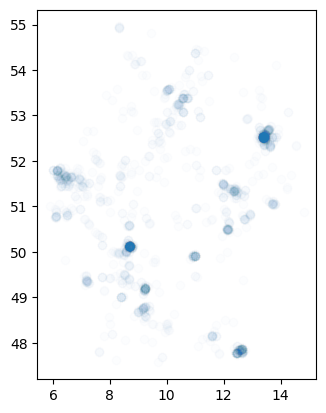

In [87]:
mapillary_trafficsigns_bi_temp.plot(alpha=0.01)

In [88]:
## now create a buffer around the traffic signs to check if there is a cycleway nearby
df_buffered = mapillary_trafficsigns_bi_temp.to_crs(25833).copy()
#df_buffered["geometry"] = df_buffered.geometry.buffer(50)
#df_buffered["geometry"] = df_buffered.geometry.buffer(40)
df_buffered["geometry"] = df_buffered.geometry.buffer(30)
df_buffered = df_buffered.to_crs(mapillary_trafficsigns_bi_temp.crs)


In [89]:
import geopandas as gpd

def mark_intersections(buffered_df, target_layer, column_name="has_intersection"):
    """
    Marks which geometries in `buffered_df` intersect with `target_layer`.

    Parameters:
    - buffered_df (GeoDataFrame): The GeoDataFrame containing buffered geometries.
    - target_layer (GeoDataFrame): The GeoDataFrame to check for intersections (e.g., cycleways, motorways).
    - column_name (str): Name of the column to add/overwrite in `buffered_df` indicating intersection (bool).

    Returns:
    - GeoDataFrame: `buffered_df` with a new boolean column `column_name`.
    """
    # Ensure CRS matches
    buffered_df = buffered_df.to_crs(target_layer.crs)

    # Perform spatial join to find intersecting geometries
    joined = gpd.sjoin(buffered_df, target_layer, how="inner", predicate="intersects")

    # Initialize the new column to False
    buffered_df[column_name] = False

    # Set True for geometries that intersect
    matches = joined.index.unique()
    buffered_df.loc[matches, column_name] = True

    return buffered_df


In [90]:
# For bicycle ways
df_buffered = mark_intersections(df_buffered, filtered_bicycle_ways, column_name="has_bi_intersection")



In [91]:


# Step 2: Ensure CRS matches
df_buffered = df_buffered.to_crs(filtered_bicycle_ways.crs)

# Step 3: Perform spatial join (find intersecting geometries)
joined = gpd.sjoin(df_buffered, filtered_bicycle_ways, how="inner", predicate="intersects")

# # Step 4: Mark which polygons had at least one intersection
# df_6months_30_buffered["has_30_intersection"] = df_6months_30_buffered.index.isin(joined.index)

# Zeilen, die mindestens einen Match haben
matches = joined.index.unique()

# Standardmäßig alles auf False setzen
df_buffered["has_bi_intersection"] = False

# Nur die gematchten Indizes auf True setzen
df_buffered.loc[matches, "has_bi_intersection"] = True



In [92]:
#df_buffered.id.unique()

In [93]:
df_buffered.has_bi_intersection.value_counts()

has_bi_intersection
True     1339
False     188
Name: count, dtype: int64

In [94]:
df_buffered_false=df_buffered[(df_buffered.has_bi_intersection== False)].copy()

In [95]:
len(df_buffered_false)

188

In [96]:
# df_buffered_false.explore(
#     color="red",
#     tiles="CartoDB positron",
#     popup=True,
#     tooltip=["value", "first_seen_at", "last_seen_at"]
# )

In [97]:
df_buffered_false


,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_bi_intersection
356,"POLYGON ((8.32137 54.93277, 8.32137 54.93275, ...",2022-07-27,632595781589613,2025-06-28,complementary--except-bicycles--g1,8570,5187,False
2761,"POLYGON ((8.60607 54.33238, 8.60608 54.33235, ...",2021-07-26,529629108114047,2025-07-20,complementary--except-bicycles--g1,8583,5234,False
7887,"POLYGON ((8.93362 54.20597, 8.93363 54.20595, ...",2023-10-01,3608263576116613,2025-05-09,complementary--except-bicycles--g1,8598,5244,False
18461,"POLYGON ((9.14319 53.8977, 9.14319 53.89768, 9...",2023-07-02,1427239748115874,2025-06-23,complementary--except-bicycles--g1,8608,5268,False
19743,"POLYGON ((9.25424 53.89232, 9.25424 53.8923, 9...",2021-09-24,329755322256569,2025-06-23,complementary--except-bicycles--g1,8613,5268,False
...,...,...,...,...,...,...,...,...
6119733,"POLYGON ((9.38363 48.80465, 9.38363 48.80463, ...",2023-03-10,217554907617213,2025-05-21,complementary--except-bicycles--g1,8619,5640,False
6186049,"POLYGON ((9.71146 49.10565, 9.71146 49.10562, ...",2017-08-12,1836104613230982,2025-07-28,complementary--bike-route--g1,8633,5619,False
6213657,"POLYGON ((9.83411 47.68743, 9.83411 47.6874, 9...",2018-06-07,555611848742199,2025-09-04,complementary--bike-route--g1,8639,5716,False
6213912,"POLYGON ((9.8341 47.68748, 9.8341 47.68746, 9....",2024-08-22,3875874152686900,2025-09-04,complementary--bike-route--g1,8639,5716,False


In [98]:
# ### import the the flagged (not created, fixed) tasks from the challenge. 

# challenge_gdf = gpd.read_file("challenge_52916_data_f_mr.geojson")
# challenge_gdf.head()

In [99]:
df_buffered_false = df_buffered_false.to_crs(4326)

In [100]:
# # Find intersections
# intersections = gpd.sjoin(df_buffered_false, challenge_gdf, how="left", predicate="intersects")

# # Keep only rows that do NOT intersect (i.e., no match in challenge_gdf)
# df_buffered_false_no_challenge = df_buffered_false.loc[intersections.index[intersections["index_right"].isna()]] 

In [101]:
# len(df_buffered_false_no_challenge)

In [102]:
## retrieve the image ID for the map features

In [103]:
df_process_img= df_buffered_false.copy()
#df_process_img= df_buffered_false_no_challenge.copy()

In [104]:
import sys
import os
import json
import logging
from contextlib import contextmanager
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# -- suppress stdout context manager --
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# -- Load config & set Mapillary token --
with open("../../config.json", "r") as f:
    config = json.load(f)

access_token = config["ACCESS_TOKEN"]
mly.interface.set_access_token(access_token)

# -- Logging cleanup --
for name in logging.root.manager.loggerDict:
    logging.getLogger(name).setLevel(logging.WARNING)
logging.basicConfig(level=logging.ERROR)

# -- Your image fetching function --
def get_image_id(map_feature_id):
    try:
        feature_str = mly.interface.feature_from_key(key=str(map_feature_id))
        feature = json.loads(feature_str)
        images = feature["features"]["properties"]["images"]["data"]
        return images[-1]["id"] if images else None
    except Exception as e:
        return None  # Or log the error if needed

# -- Parallelized version using ThreadPoolExecutor --
def parallel_get_image_ids(ids, max_workers=8):
    results = [None] * len(ids)

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(get_image_id, id_): idx for idx, id_ in enumerate(ids)}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Fetching image IDs"):
            idx = futures[future]
            try:
                results[idx] = future.result()
            except Exception:
                results[idx] = None  # Or log
    return results

# -- Apply to your dataframe --
with suppress_stdout():
    df_process_img["image_id"] = parallel_get_image_ids(df_process_img["id"].tolist(), max_workers=5)  # Adjust max_workers as needed, 5 is fastest for me


Fetching image IDs: 100%|██████████| 188/188 [00:37<00:00,  5.07it/s]


In [105]:
df_process_img.head()

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_bi_intersection,image_id
356,"POLYGON ((8.32137 54.93277, 8.32137 54.93275, ...",2022-07-27,632595781589613,2025-06-28,complementary--except-bicycles--g1,8570,5187,False,1255722738584580
2761,"POLYGON ((8.60607 54.33238, 8.60608 54.33235, ...",2021-07-26,529629108114047,2025-07-20,complementary--except-bicycles--g1,8583,5234,False,254344209538601
7887,"POLYGON ((8.93362 54.20597, 8.93363 54.20595, ...",2023-10-01,3608263576116613,2025-05-09,complementary--except-bicycles--g1,8598,5244,False,316973234294869
18461,"POLYGON ((9.14319 53.8977, 9.14319 53.89768, 9...",2023-07-02,1427239748115874,2025-06-23,complementary--except-bicycles--g1,8608,5268,False,287829883760175
19743,"POLYGON ((9.25424 53.89232, 9.25424 53.8923, 9...",2021-09-24,329755322256569,2025-06-23,complementary--except-bicycles--g1,8613,5268,False,291704089152985


In [106]:
centroids = df_process_img.copy()
centroids=centroids.to_crs(25832)
centroids["geometry"] = centroids.geometry.centroid
centroids=centroids.to_crs(4326)

centroids.sort_values("last_seen_at")


,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_bi_intersection,image_id
1620657,POINT (13.34301 52.53199),2020-09-19,168149768578569,2025-01-04,complementary--except-bicycles--g1,8799,5372,False,1469617330078063
2468561,POINT (10.82679 49.8408),2018-02-06,4195092427209113,2025-01-07,complementary--except-bicycles--g1,8684,5567,False,3031651803729937
297004,POINT (12.71387 51.23121),2017-07-08,512010826647493,2025-01-08,complementary--except-bicycles--g1,8770,5468,False,312605273571926
3088047,POINT (12.34475 48.45459),2019-07-20,2614969125462311,2025-01-11,complementary--except-bicycles--g1,8753,5664,False,2919796648276597
3301686,POINT (7.21695 49.35488),2022-08-10,5322488887871056,2025-01-25,complementary--except-bicycles--g1,8520,5601,False,819587632741336
...,...,...,...,...,...,...,...,...,...
159074,POINT (12.12018 50.51633),2021-07-15,594080014894596,2025-10-02,complementary--except-bicycles--g1,8743,5519,False,186237046812853
3291535,POINT (7.17789 49.38258),2016-05-07,509113643559760,2025-10-03,complementary--except-bicycles--g1,8518,5599,False,276390127478683
3293245,POINT (7.17839 49.37848),2019-04-22,850196612514612,2025-10-03,complementary--except-bicycles--g1,8518,5600,False,489452362250321
2003322,POINT (12.84929 52.9501),2023-07-27,1340140220192311,2025-10-05,complementary--except-bicycles--g1,8776,5340,False,6643269562379249


In [107]:


# Mapping dictionary
value_to_vz = {    
    'complementary--except-bicycles--g1': "1022-10",
    'complementary--bike-route--g1': "1000-33"
}

# Add new column based on mapping
centroids["VZ"] = centroids["value"].map(value_to_vz)




In [108]:
#centroids

In [109]:
import uuid

def to_maproulette_geojson_with_links(gdf, id_field="id", name_field="value", image_field="image_id"):
    features = []

    for _, row in gdf.iterrows():
        geom = row.geometry
        centroid = geom.centroid
        lat, lon = round(centroid.y, 6), round(centroid.x, 6)

        # Optional: Mapillary image
        image_url = None
        image_id = None
        if pd.notna(row.get(image_field)):
            image_id = str(int(row[image_field]))
            image_url = (
                f"https://www.mapillary.com/app/?pKey={image_id}"
                "&focus=photo"
                "&trafficSign[]=complementary--except-bicycles--g1"
                "&trafficSign[]=complementary--bike-route--g1"
            )

        # TILDA link
        tilda_url = f"https://tilda-geo.de/regionen/radinfra?map=17.4/{lat}/{lon}&config=pdqyyt.7h3d.16g9vk&v=2"

#         # Build instruction
        instruction = f"""  
### 🚧 Aufgabe: Verkehrszeichen **DE:{row["VZ"]}** überprüfen und Radinfra hinzufügen
Bitte schaue dir den Bereich rund um dieses erkannte Verkehrszeichen an. Vermutlich fehlt hier eine Radinfrastruktur (bicycle=yes), die du hinzufügen kannst.

---

### 🖼️ Bild & Karte

- 📷 [**Mapillary-Bild anzeigen**]({image_url})  
(Hinweis: Das zuerst angezeigte Bild ist wahrscheinlich nicht das neueste – die neueste Aufnahme hier ist von **{row["last_seen_at"]})**

- 🗺️ [**In radinfra.de bzw TILDA ansehen**]({tilda_url})  
(Hinweis: Ist hilfreich um den aktuellen Stand der Radinfrastruktur vor Ort zu prüfen.)

---

### 📚 Nützliche Links

- 🛑 [**Traffic Sign Tool** – DE:{row["VZ"]}](https://trafficsigns.osm-verkehrswende.org/DE?signs=DE:{row["VZ"]})  
- 🚴 [**OSM-Wiki: Radverkehrsanlagen kartieren**](https://wiki.openstreetmap.org/wiki/DE:Bicycle/Radverkehrsanlagen_kartieren)

---

Viel Erfolg beim Prüfen und Mappen! 🗺️
        """

        # Build properties
        props = {
            # "image_id": str(row[id_field]),
            "image_id": str(row[image_field]),
            "Verkehrzeichen": str(row["VZ"]),
            "instruction": instruction#.strip()
        }

        # Build feature
        feature = {
            "type": "Feature",
            "geometry": row["geometry"].__geo_interface__,
            "properties": props,
            # Set the top-level ID here
            "id": str(row[id_field]),
        }


        features.append(feature)

    return {
        "type": "FeatureCollection",
        "features": features
    }


In [110]:
# Convert your df_buffered_false (or any GeoDataFrame) to GeoJSON
maproulette_geojson = to_maproulette_geojson_with_links(centroids)

# Save to file
with open("maproulette_tasks_missing-bicycle.geojson", "w") as f:
    json.dump(maproulette_geojson, f, indent=2)


In [ ]:
### Maproulette stuff....

In [ ]:
## Add missing cycleways based on mapillary signs (Germany)


## 🚲 Fehlende Radwege anhand von Mapillary-Verkehrszeichen ergänzen (Deutschland)

Diese Challenge basiert auf automatisch erkannten, radverkehrsbezogenen Verkehrszeichen aus Mapillary-Bildern in Deutschland.

### 📌 Kriterien für jede Aufgabe

Nur Aufgaben, die **alle** folgenden Bedingungen erfüllen, wurden berücksichtigt:

- Das Verkehrszeichen wurde **in Mapillary erkannt**.
- Es handelt sich um ein **radverkehrsbezogenes Zeichen**  
  *(z. B. gemeinsamer Geh- und Radweg, reiner Radweg, getrennter Geh-/Radweg)*.
- Das Zeichen wurde **mindestens 12 Monate lang regelmäßig gesehen**.
- Die neuste Aufnahme stammt **aus dem Jahr 2025**.
- Es existiert **kein OSM-"Radweg" innerhalb von 50 m** des Standortes.

---

### 🔍 Was du tun solltest

1. Öffne den Ort in **Mapillary** und **radinfra.de** sowie einem Editor.
2. Prüfe, ob an der Stelle eine **Radinfrastruktur fehlt**.
3. Falls ja, ergänze die passenden OSM-Tags:  
   z. B. `highway=cycleway`, `cycleway=*`, `bicycle=designated`, etc.
4. Wenn bereits alles korrekt gemappt ist, kannst du die Aufgabe einfach **als erledigt markieren**.

---

🗺️ Vielen Dank für deine Hilfe beim Ausbau der Radinfrastruktur in OSM!

In [ ]:
'''
{{instruction}}
                                                                                             .
'''